
# 📊 SOLAQUA - Enhanced Synchronized Sonar & Net Distance Analysis
---

In [1]:
# 🔧 SETUP AND IMPORTS
# ===================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import importlib
import warnings

# Import SOLAQUA utilities
import utils.sonar_distance_analysis as sda
import utils.sonar_utils as sonar_utils

# Force reload utilities to get latest changes
importlib.reload(sda)
importlib.reload(sonar_utils)

# Configuration
warnings.filterwarnings('ignore', category=FutureWarning)
plt.rcParams['figure.figsize'] = (16, 12)

print("✅ All libraries imported and utilities loaded!")
print("🚀 Ready for streamlined sonar distance analysis!")

✅ All libraries imported and utilities loaded!
🚀 Ready for streamlined sonar distance analysis!


## 🎛️ Configuration

**Change these parameters to switch bags and frames:**

In [7]:
# 🎯 ANALYSIS CONFIGURATION
# =========================
# **CHANGE THESE PARAMETERS TO SWITCH ANALYSIS TARGET**

TARGET_BAG = "2024-08-22_14-06-43"  # 🔄 Change this to switch bags
FRAME_INDEX = 200                     # 🔄 Change this to switch frames
EXPORTS_FOLDER = "/Users/eirikvarnes/code/SOLAQUA/exports"

print(f"🎯 Analysis Configuration:")
print(f"   📁 Target Bag: {TARGET_BAG}")
print(f"   🖼️  Frame Index: {FRAME_INDEX}")
print(f"   📂 Exports Folder: {EXPORTS_FOLDER}")

🎯 Analysis Configuration:
   📁 Target Bag: 2024-08-22_14-06-43
   🖼️  Frame Index: 200
   📂 Exports Folder: /Users/eirikvarnes/code/SOLAQUA/exports


## 📡 Data Loading

Load all distance measurement data for the configured bag:

In [8]:
# 📡 LOAD ALL DISTANCE DATA FOR TARGET BAG
# ========================================

print(f"📡 Loading all distance data for bag: {TARGET_BAG}")
print("=" * 60)

# Load all data using utility function
raw_data, distance_measurements = sda.load_all_distance_data_for_bag(TARGET_BAG, EXPORTS_FOLDER)

# Extract individual datasets for easy access
nav_data = raw_data['navigation']
guidance_data = raw_data['guidance']

print(f"\n✅ Data loading complete!")
print(f"   📊 Navigation records: {len(nav_data) if nav_data is not None else 0}")
print(f"   📊 Guidance records: {len(guidance_data) if guidance_data is not None else 0}")
print(f"   📊 Distance sensors: {len(distance_measurements)}")

if distance_measurements:
    print(f"\n📏 Available distance measurements:")
    for name, info in distance_measurements.items():
        print(f"   • {name}: {info['description']}")

📡 Loading all distance data for bag: 2024-08-22_14-06-43
🎯 LOADING ALL DISTANCE DATA FOR BAG: 2024-08-22_14-06-43
📡 1. Loading Navigation Data...
   ✅ Loaded 322 navigation records
📡 2. Loading Guidance Data...
   ✅ Loaded 317 guidance records with ['error_net_distance', 'desired_net_distance', 'r_net_distance_d']
📡 3. Loading DVL Altimeter...
   ✅ Loaded 17 DVL altimeter records
📡 4. Loading USBL...
   ✅ Loaded 17 USBL records
📡 5. Loading DVL Position...
   ✅ Loaded 154 DVL position records
📡 6. Loading Navigation Position...
   ✅ Loaded 156 navigation position records
📡 7. Loading INS Z Position...
   ✅ Loaded 366 INS records with positionFrame.z

📊 LOADING SUMMARY:
   🎯 Target bag: 2024-08-22_14-06-43
   📁 Raw data loaded: 2/2
   📏 Distance measurements: 6

✅ Data loading complete!
   📊 Navigation records: 322
   📊 Guidance records: 317
   📊 Distance sensors: 6

📏 Available distance measurements:
   • DVL_Altimeter: Distance to seafloor
   • USBL_3D: 3D acoustic position
   • USBL_

## 🔬 Raw Data Extraction

Extract raw sonar data with run-specific parameters:

In [9]:
# 🎯 INTERACTIVE SONAR WITH ROTATED NET LINE (USING PITCH)
# ========================================================

import matplotlib.patches as patches

# Extract raw sonar data with configurable rmax
raw_matrix, processed_cone, extent, sonar_params = sda.extract_raw_sonar_data_with_configurable_rmax(
    TARGET_BAG, 
    FRAME_INDEX,
    rmax=None,  # Set to specific value like 25.0, or None for automatic
    exports_folder=EXPORTS_FOLDER
)


🔬 EXTRACTING RAW SONAR DATA WITH CONFIGURABLE RMAX
   📁 Bag: 2024-08-22_14-06-43
   🖼️  Frame: 200
   📏 rmax: default (20.0m)
📊 SONAR PARAMETERS:
   🏷️  Run Type: multi_dvl_early
   📏 Range Max: 20.0m (default)
   📝 Description: NFH, 2m depth, 0.5-1.0m distance, 0.2 m/s speed
📡 Loading sonar data from: sensor_sonoptix_echo_image__2024-08-22_14-06-43_video.csv
   ✅ Loaded 592 sonar frames
🔍 Extracting raw sonar frame 200...
   ✅ Raw matrix shape: (1024, 256)
   📊 Value range: 0.000 to 65.000
⚙️  Processing with rmax=20.0m...
   ✅ Processed cone shape: (700, 900)
   📐 Extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)
   🕐 Timestamp: 12:06:58
   ✅ Loaded 592 sonar frames
🔍 Extracting raw sonar frame 200...
   ✅ Raw matrix shape: (1024, 256)
   📊 Value range: 0.000 to 65.000
⚙️  Processing with rmax=20.0m...
   ✅ Processed cone shape: (700, 900)
   📐 Extent: (np.float64(-4.330127018922193), np.float64(4.330127018922193), 0.0, 5.0)
   🕐 Timestamp: 12:06:58


/var/folders/x9/scyyg02s20v0759sw_qxdlqc0000gn/T/ipykernel_78668/3307679793.py:146: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/x9/scyyg02s20v0759sw_qxdlqc0000gn/T/ipykernel_78668/3307679793.py:146: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/eirikvarnes/code/SOLAQUA/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129349 (\N{GOAL NET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


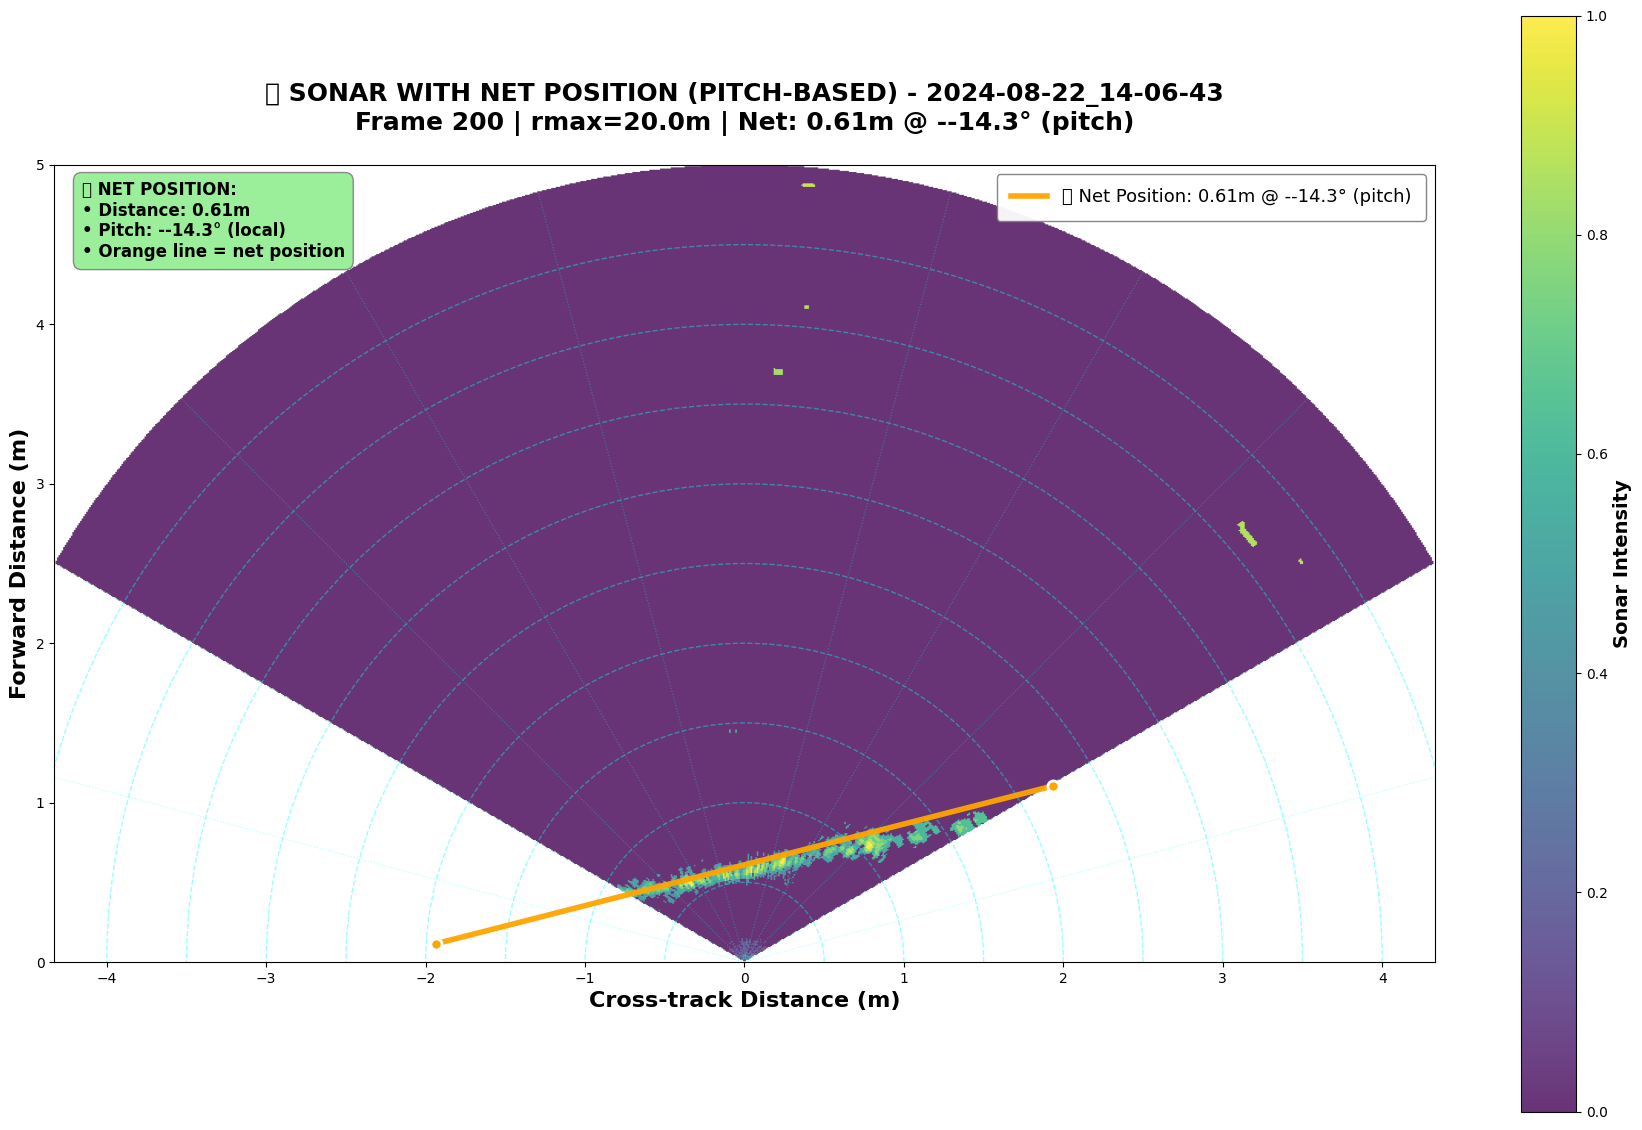

In [10]:
if processed_cone is not None:
    # Get synchronized distance measurements and angle data for this frame
    sonar_csv_file = Path(EXPORTS_FOLDER) / "by_bag" / f"sensor_sonoptix_echo_image__{TARGET_BAG}_video.csv"
    if sonar_csv_file.exists():
        sonar_df = pd.read_csv(sonar_csv_file)
        if FRAME_INDEX < len(sonar_df):
            sonar_timestamp = pd.to_datetime(sonar_df.loc[FRAME_INDEX, 'ts_utc'])
            distance_data = sda.collect_distance_measurements_at_timestamp(
                sonar_timestamp, nav_data, guidance_data, distance_measurements
            )
            
            # Enhanced net PITCH angle extraction (local orientation)
            net_angle_rad = 0.0
            net_angle_deg = 0.0
            angle_source = "default (straight ahead)"
                        
            # Try navigation data (NetPitch) - LOCAL ORIENTATION
            if nav_data is not None and 'NetPitch' in nav_data.columns:
                nav_time_diffs = abs(nav_data['timestamp'] - sonar_timestamp)
                min_time_diff = nav_time_diffs.min()
                
                if min_time_diff <= pd.Timedelta('5s'):
                    nav_idx = nav_time_diffs.idxmin()
                    net_angle_rad = nav_data.loc[nav_idx, 'NetPitch']
                    net_angle_deg = np.degrees(net_angle_rad)
                    angle_source = f"navigation NetPitch (Δt: {min_time_diff.total_seconds():.3f}s)"
            
            # Direct file load if still no angle
            if abs(net_angle_deg) < 0.1:
                nav_file = Path(EXPORTS_FOLDER) / "by_bag" / f"navigation_plane_approximation__{TARGET_BAG}_data.csv"
                if nav_file.exists():
                    direct_nav_df = pd.read_csv(nav_file)
                    direct_nav_df['timestamp'] = pd.to_datetime(direct_nav_df['ts_utc'])
                    
                    direct_time_diffs = abs(direct_nav_df['timestamp'] - sonar_timestamp)
                    direct_min_diff = direct_time_diffs.min()
                    
                    if direct_min_diff <= pd.Timedelta('5s'):
                        direct_idx = direct_time_diffs.idxmin()
                        net_angle_rad = direct_nav_df.loc[direct_idx, 'NetPitch']
                        net_angle_deg = np.degrees(net_angle_rad)
                        angle_source = f"direct navigation file"
            
            # Create enhanced visualization - HORIZONTAL LINE ROTATED BY NET PITCH (LOCAL)
            fig, ax = plt.subplots(figsize=(18, 14))
            
            # Display the sonar cone
            im = ax.imshow(processed_cone, extent=extent, origin='lower', cmap='viridis', alpha=0.8)
            
            # Focus ONLY on Navigation NetDistance with proper rotation
            if distance_data and 'Navigation NetDistance' in distance_data:
                distance = distance_data['Navigation NetDistance']['value']
                
                if distance <= sonar_params['rmax']:
                    # Create a net line where 0° = parallel to x-axis (cross-track)
                    # Start with cross-track oriented line (horizontal), then rotate by pitch
                    net_half_width = 2.0  # Half width of the net line
                    
                    # Original cross-track oriented line points (0° reference = parallel to x-axis)
                    original_x1 = -net_half_width
                    original_y1 = 0  # Start at origin level
                    original_x2 = net_half_width  
                    original_y2 = 0  # Start at origin level
                    
                    # Rotate by NEGATIVE net pitch angle (0° = parallel to x-axis)
                    cos_angle = np.cos(-net_angle_rad)  # Use negative angle
                    sin_angle = np.sin(-net_angle_rad)  # Use negative angle
                    
                    # Apply rotation matrix to both endpoints
                    rotated_x1 = original_x1 * cos_angle - original_y1 * sin_angle
                    rotated_y1 = original_x1 * sin_angle + original_y1 * cos_angle
                    rotated_x2 = original_x2 * cos_angle - original_y2 * sin_angle
                    rotated_y2 = original_x2 * sin_angle + original_y2 * cos_angle
                    
                    # Translate the rotated line to the net distance
                    rotated_x1 += 0  # No x offset
                    rotated_y1 += distance  # Move to net distance
                    rotated_x2 += 0  # No x offset  
                    rotated_y2 += distance  # Move to net distance
                    
                    # Draw ONLY the rotated net line (thinner orange line)
                    ax.plot([rotated_x1, rotated_x2], [rotated_y1, rotated_y2], 
                           color='orange', linewidth=4, alpha=0.95, 
                           label=f"🥅 Net Position: {distance:.2f}m @ -{net_angle_deg:.1f}° (pitch)", zorder=5)
                    
                    # Add smaller endpoints
                    ax.plot([rotated_x1, rotated_x2], [rotated_y1, rotated_y2], 'o', 
                           color='orange', markersize=8, markeredgecolor='white', 
                           markeredgewidth=2, zorder=6)
                    
            # Simplified range rings (no white text boxes)
            range_rings = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]
            for r in range_rings:
                if r <= extent[3]:
                    circle = patches.Circle((0, 0), r, fill=False, color='cyan', 
                                          alpha=0.4, linewidth=1, linestyle='--', zorder=1)
                    ax.add_patch(circle)
            
            # Simplified bearing lines (thinner)
            angles = np.arange(-75, 76, 15)
            for angle in angles:
                if angle != 0:
                    angle_rad = np.radians(angle)
                    x_end_bearing = extent[3] * np.sin(angle_rad)
                    y_end_bearing = extent[3] * np.cos(angle_rad)
                    ax.plot([0, x_end_bearing], [0, y_end_bearing], color='cyan', alpha=0.3, 
                           linewidth=0.8, linestyle=':', zorder=1)
            
            # ENHANCED FORMATTING
            ax.set_xlabel('Cross-track Distance (m)', fontsize=16, fontweight='bold')
            ax.set_ylabel('Forward Distance (m)', fontsize=16, fontweight='bold')
            
            # ENHANCED TITLE
            title = f"🎯 SONAR WITH NET POSITION (PITCH-BASED) - {TARGET_BAG}\n"
            title += f"Frame {FRAME_INDEX} | rmax={sonar_params['rmax']}m"
            if distance_data and 'Navigation NetDistance' in distance_data:
                title += f" | Net: {distance_data['Navigation NetDistance']['value']:.2f}m @ -{net_angle_deg:.1f}° (pitch)"
            ax.set_title(title, fontsize=18, fontweight='bold', pad=25)
            
            # SIMPLIFIED LEGEND
            ax.legend(loc='upper right', fontsize=13, framealpha=0.95, 
                     fancybox=True, shadow=False, borderpad=0.8, 
                     facecolor='white', edgecolor='gray')
            
            # Colorbar (no grid)
            cbar = plt.colorbar(im, ax=ax, shrink=0.8)
            cbar.set_label('Sonar Intensity', fontsize=14, fontweight='bold')
            
            # Set aspect and limits
            ax.set_aspect('equal')
            ax.set_xlim(extent[0], extent[1])
            ax.set_ylim(extent[2], extent[3])
            
            # SIMPLIFIED INFO BOX
            if distance_data and 'Navigation NetDistance' in distance_data:
                info_text = f"🎯 NET POSITION:\n"
                info_text += f"• Distance: {distance_data['Navigation NetDistance']['value']:.2f}m\n"
                info_text += f"• Pitch: -{net_angle_deg:.1f}° (local)\n"
                info_text += f"• Orange line = net position"
                
                ax.text(0.02, 0.98, info_text, transform=ax.transAxes, fontsize=12,
                        verticalalignment='top', fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', 
                        alpha=0.9, edgecolor='gray', linewidth=1), zorder=10)
            
            plt.tight_layout()
            plt.show()
else:
    print(f"❌ Failed to extract raw sonar data for {TARGET_BAG}, frame {FRAME_INDEX}")

## 📋 SOLAQUA Dataset Overview

### 🌊 Available Experimental Datasets

| Bag ID | Date | Type | D0 | D1 | Z | V | rmax | Comment |
|--------|------|------|----|----|---|---|------|---------|
| `2024-08-20_13-39-34` | 2024-08-20 | Calibration | 1.5 | 1.5 | 2 | 0.2 | 20m | Stereo camera calibration |
| `2024-08-20_13-40-35` | 2024-08-20 | Calibration | 1.5 | 1.5 | 2 | 0.2 | 20m | Stereo camera calibration |
| `2024-08-22_14-06-43` | 2024-08-22 | Multi-DVL NFH | 0.5-1.0 | - | 2 | 0.2 | 20m | Early multi-DVL experiment |
| `2024-08-22_14-29-05` | 2024-08-22 | Multi-DVL NFH | 0.6-0.8 | - | 2 | 0.1 | 20m | Optimized multi-DVL |
| `2024-08-22_14-47-39` | 2024-08-22 | Multi-DVL NFH | 0.6 | 0.6 | 2 | 0.1 | 20m | Constant distance experiment |

### 📊 Parameter Definitions:
- **D0/D1**: Initial/Final desired distance to net [m]
- **Z**: Depth [m] 
- **V**: Net-relative velocity [m/s]
- **rmax**: Sonar maximum range [m]
- **NFH**: Net Following Horizontal
- **Multi-DVL**: Experiments using Waterlinked A50 + Nortek Nucleus 1000 DVLs

### 🎯 Available Sensor Data:
IMU, Gyroscope, DVL, USBL, Multibeam sonar, Ping 360 sonar, Mono/Stereo cameras, Depth/Pressure/Temperature sensors

---